In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa as lib
import librosa.display as libd
import os 

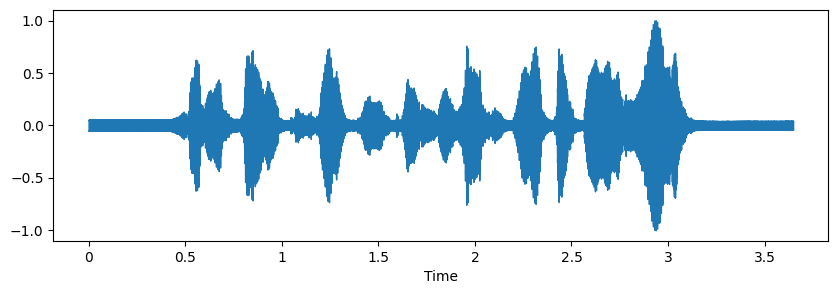

In [2]:
wav_path=[]

wav_list=os.listdir('dataset/')

for i in range(len(wav_list)):
    joining=os.path.join('dataset',wav_list[i])
    wav_path.append(joining)

example_wav_file=wav_path[0]

plt.figure(figsize=(10,3))

lib_data,lib_sample_rate=lib.load(example_wav_file)
# libd.specshow(lib_data)
libd.waveshow(lib_data,sr=lib_sample_rate)
ipd.Audio(example_wav_file,rate=lib_sample_rate)

In [3]:
lib_data,lib_sample_rate

(array([0.03548561, 0.05175975, 0.0457577 , ..., 0.04195745, 0.04038322,
        0.04235241], dtype=float32),
 22050)

In [4]:
anger_sad_path=[]
disgust_path=[]
fear_path=[]
happy_path=[]
neutral_path=[]
surprise_path=[]

cleaned_wav_list=[]
for i in wav_list:
    splitting_wave_list1=i.split('.')[0]
    splitting_wave_list2=splitting_wave_list1.split('_')[1]
    
    cleaned_wav_list.append(splitting_wave_list2)

for i,wav_file in enumerate(cleaned_wav_list):
    for alphabet in wav_file:
        if alphabet=='a':
            anger_sad_path.append(os.path.join('dataset',wav_list[i]))
        
        elif alphabet=='d':
            disgust_path.append(os.path.join('dataset',wav_list[i]))
        
        elif alphabet=='f':
            fear_path.append(os.path.join('dataset',wav_list[i]))
        
        elif alphabet=='h':
            happy_path.append(os.path.join('dataset',wav_list[i]))
        
        elif alphabet=='n':
            neutral_path.append(os.path.join('dataset',wav_list[i]))
        
        elif alphabet=='u':
            surprise_path.append(os.path.join('dataset',wav_list[i]))    

In [5]:
sad_path2d=[]
anger_path2d=[]

sad_path2d.append(anger_sad_path[15:30])
sad_path2d.append(anger_sad_path[45:60])
sad_path2d.append(anger_sad_path[75:90])
sad_path2d.append(anger_sad_path[105:120])

anger_path2d.append(anger_sad_path[0:15])
anger_path2d.append(anger_sad_path[30:45])
anger_path2d.append(anger_sad_path[60:75])
anger_path2d.append(anger_sad_path[90:105])

In [6]:
sad_path=[]
anger_path=[]

for two_d in sad_path2d:
    for one_d in two_d:
        sad_path.append(one_d)

for two_d in anger_path2d:
    for one_d in two_d:
        anger_path.append(one_d)

In [7]:
len(fear_path)

60

In [8]:
len(lib_data)

80434

In [9]:
lib_sample_rate

22050

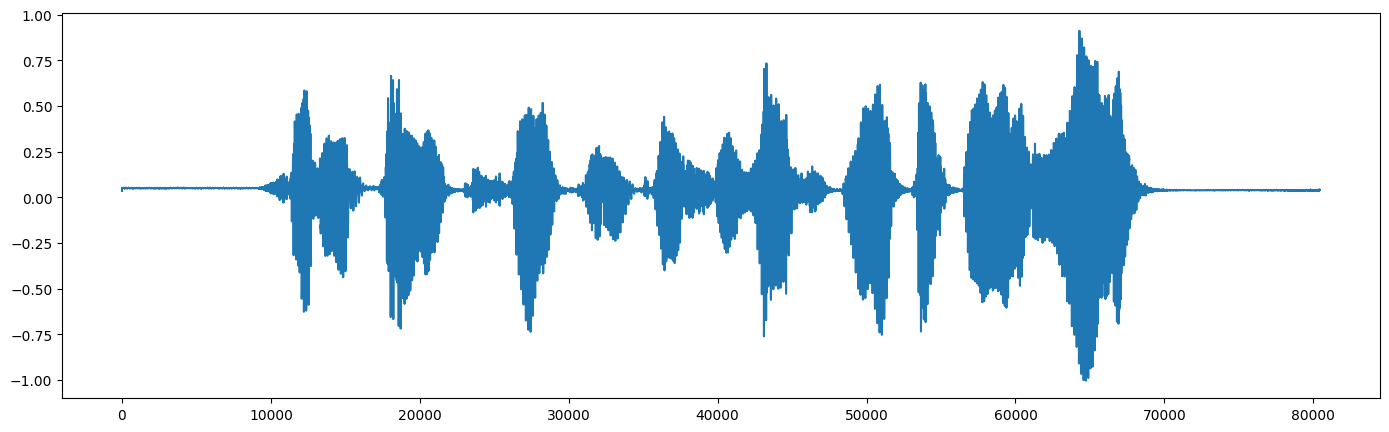

In [10]:
plt.figure(figsize=(17,5))
plt.plot(lib_data)

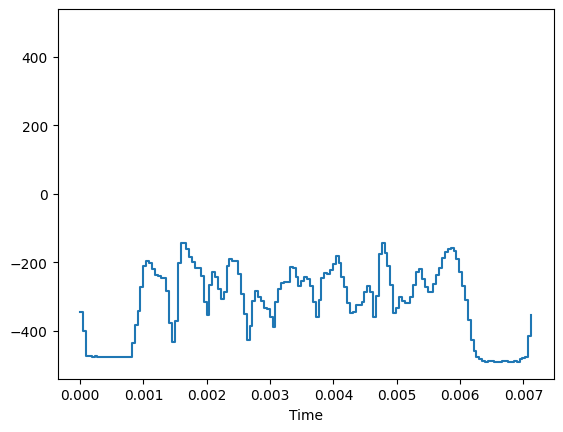

In [11]:
example_mfcc=lib.feature.mfcc(y=lib_data,sr=lib_sample_rate,n_mfcc=40)
libd.waveshow(example_mfcc)

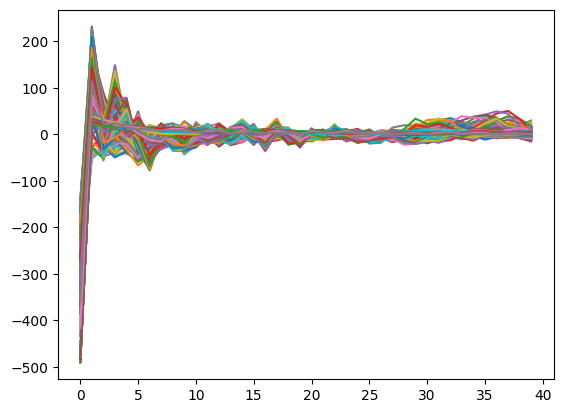

In [12]:
plt.plot(example_mfcc)

In [13]:
# example_mfcc[0],
# np.mean(example_mfcc.T[1],
#         axis=0)
np.mean(example_mfcc.T,axis=0)

array([-3.1813300e+02,  1.1258424e+02,  1.2380675e+01,  3.4588459e+01,
        1.1627494e+01, -2.9239061e+00, -2.4850231e+01, -2.6021698e+00,
       -9.9451309e-01, -1.1588840e+01, -2.4816618e+00, -9.7480869e-01,
       -9.2352390e-01, -1.6430587e+00,  5.1829615e+00,  6.5669388e-01,
       -3.4011285e+00,  5.5892935e+00, -9.2596358e-01, -5.7384229e+00,
        5.8995381e-02,  5.3902203e-01,  1.7860067e+00, -2.0818620e+00,
       -1.2514961e+00, -3.5342755e+00, -4.1984100e+00, -1.5991627e-01,
       -2.0079002e+00,  5.8545113e-01,  1.4086916e+00,  1.7188708e+00,
        3.2310727e+00,  2.7378042e+00,  3.4663348e+00,  5.0549593e+00,
        4.8320751e+00,  5.6043711e+00,  4.3045549e+00,  3.3932874e+00],
      dtype=float32)

In [14]:
def feature_extraction(file_name):
    read_file,sample_rate=lib.load(file_name)
    mfcc_feature=lib.feature.mfcc(y=read_file,sr=sample_rate,n_mfcc=40)
    scaled_mfcc_feature=np.mean(mfcc_feature.T,axis=0)
    return scaled_mfcc_feature

In [15]:
feature_extraction(anger_path[0])

array([-3.1813300e+02,  1.1258424e+02,  1.2380675e+01,  3.4588459e+01,
        1.1627494e+01, -2.9239061e+00, -2.4850231e+01, -2.6021698e+00,
       -9.9451309e-01, -1.1588840e+01, -2.4816618e+00, -9.7480869e-01,
       -9.2352390e-01, -1.6430587e+00,  5.1829615e+00,  6.5669388e-01,
       -3.4011285e+00,  5.5892935e+00, -9.2596358e-01, -5.7384229e+00,
        5.8995381e-02,  5.3902203e-01,  1.7860067e+00, -2.0818620e+00,
       -1.2514961e+00, -3.5342755e+00, -4.1984100e+00, -1.5991627e-01,
       -2.0079002e+00,  5.8545113e-01,  1.4086916e+00,  1.7188708e+00,
        3.2310727e+00,  2.7378042e+00,  3.4663348e+00,  5.0549593e+00,
        4.8320751e+00,  5.6043711e+00,  4.3045549e+00,  3.3932874e+00],
      dtype=float32)

In [16]:
from tqdm import tqdm

In [17]:
all_files_path=[anger_path,disgust_path,fear_path,happy_path,neutral_path,sad_path,surprise_path]
extracted_features=[]

for label,files_path in tqdm(enumerate(all_files_path)):
    for file_path in files_path:
        # print(file_path)
        # break
        # print(file_path,i)
        mfccs=feature_extraction(file_path)
        extracted_features.append([mfccs,label])

7it [00:16,  2.43s/it]


In [18]:
extracted_features[0]

[array([-3.1813300e+02,  1.1258424e+02,  1.2380675e+01,  3.4588459e+01,
         1.1627494e+01, -2.9239061e+00, -2.4850231e+01, -2.6021698e+00,
        -9.9451309e-01, -1.1588840e+01, -2.4816618e+00, -9.7480869e-01,
        -9.2352390e-01, -1.6430587e+00,  5.1829615e+00,  6.5669388e-01,
        -3.4011285e+00,  5.5892935e+00, -9.2596358e-01, -5.7384229e+00,
         5.8995381e-02,  5.3902203e-01,  1.7860067e+00, -2.0818620e+00,
        -1.2514961e+00, -3.5342755e+00, -4.1984100e+00, -1.5991627e-01,
        -2.0079002e+00,  5.8545113e-01,  1.4086916e+00,  1.7188708e+00,
         3.2310727e+00,  2.7378042e+00,  3.4663348e+00,  5.0549593e+00,
         4.8320751e+00,  5.6043711e+00,  4.3045549e+00,  3.3932874e+00],
       dtype=float32),
 0]

In [20]:
# First approach to seperate into Features and Labels
import pandas as pd
df=pd.DataFrame(extracted_features,columns=['Features','Labels'])

In [54]:
df

,Features,Labels
0,"[-318.133, 112.58424, 12.380675, 34.58846, 11....",0
1,"[-297.13522, 121.770996, -7.801143, 18.550959,...",0
2,"[-334.13684, 99.70053, 4.931632, 26.754679, 10...",0
3,"[-286.4895, 102.8327, 7.022041, 15.775354, 7.5...",0
4,"[-296.59256, 94.00349, 0.5745141, 22.929646, 1...",0
...,...,...
475,"[-580.7057, 98.990906, 28.636457, 44.699722, 7...",6
476,"[-556.7774, 120.058655, 28.791594, 36.44409, 1...",6
477,"[-585.12396, 121.73822, 38.56852, 28.324816, 9...",6
478,"[-561.785, 107.838486, 26.997883, 25.284006, 5...",6


In [60]:
features=df['Features']
labels=df['Labels']

In [59]:
features=features.to_numpy()
labels=labels.to_numpy()

In [61]:
from sklearn.model_selection import train_test_split
features_train,features_test,labels_train,labels_test=train_test_split(features,labels,test_size=0.1)
labels_train

350    4
325    4
87     1
170    2
357    4
      ..
68     1
176    2
448    6
252    4
120    2
Name: Labels, Length: 432, dtype: int64

In [62]:
extracted_features[0][1]

0

In [63]:
# Second approach to extract Features and Labels
x,y=[],[]
for i,extracted_feature in enumerate(extracted_features):
    features=extracted_features[i][0]
    labels=extracted_features[i][1]
    x.append(features)
    y.append(labels)

In [64]:
# Better approach is the first one

In [65]:
x=np.array(x)
y=np.array(y)

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [67]:
from tensorflow.keras import KerasTensor 
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense,Dropout,Flatten

In [68]:
KerasTensor(x_train)

ValueError: Invalid dtype: ndarray

In [81]:
model=Sequential([
    Dense(32,input_shape=(40,),activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(256,activation='relu'),
    # Flatten(),
    Dense(7,activation='sigmoid')
])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 32)                  │           1,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,567 (181.90 KB)

 Trainable params: 46,567 (181.90 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
model.compile(
    optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['acc']
)

In [83]:
type(labels_train)

pandas.core.series.Series

In [88]:
x_train

array([[-4.00316650e+02,  1.30026825e+02,  3.47994881e+01, ...,
        -2.24201024e-01,  1.14470661e+00,  9.50842738e-01],
       [-4.42457855e+02,  1.38525558e+02,  3.24576073e+01, ...,
         1.81992745e+00,  1.97631824e+00,  1.90272152e+00],
       [-3.05756958e+02,  1.01146133e+02,  2.08785439e+01, ...,
         5.20646048e+00,  5.84108400e+00,  4.60113764e+00],
       ...,
       [-3.77790802e+02,  1.33175842e+02,  2.45060711e+01, ...,
         4.44299132e-01,  2.96779454e-01, -3.81795987e-02],
       [-4.31714539e+02,  9.18701553e+01,  3.49100418e+01, ...,
         6.52002859e+00,  5.00244045e+00,  5.53116608e+00],
       [-5.63484558e+02,  1.04980194e+02,  2.62997246e+01, ...,
         1.98891640e+00, -3.97141933e-01, -5.31708114e-02]], dtype=float32)

In [84]:
features_train[0]

array([-3.1813300e+02,  1.1258424e+02,  1.2380675e+01,  3.4588459e+01,
        1.1627494e+01, -2.9239061e+00, -2.4850231e+01, -2.6021698e+00,
       -9.9451309e-01, -1.1588840e+01, -2.4816618e+00, -9.7480869e-01,
       -9.2352390e-01, -1.6430587e+00,  5.1829615e+00,  6.5669388e-01,
       -3.4011285e+00,  5.5892935e+00, -9.2596358e-01, -5.7384229e+00,
        5.8995381e-02,  5.3902203e-01,  1.7860067e+00, -2.0818620e+00,
       -1.2514961e+00, -3.5342755e+00, -4.1984100e+00, -1.5991627e-01,
       -2.0079002e+00,  5.8545113e-01,  1.4086916e+00,  1.7188708e+00,
        3.2310727e+00,  2.7378042e+00,  3.4663348e+00,  5.0549593e+00,
        4.8320751e+00,  5.6043711e+00,  4.3045549e+00,  3.3932874e+00],
      dtype=float32)

In [119]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8603 - loss: 0.4575 
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7712 - loss: 0.5653 
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7987 - loss: 0.5667 
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7430 - loss: 0.5977 
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7592 - loss: 0.5813  
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7652 - loss: 0.5940 
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7910 - loss: 0.4921 
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7800 - loss: 0.5632 
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7964 - loss: 0.5125 
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7494 - loss: 0.6294 
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8028 - loss: 0.5416 
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7683 - loss: 0.6138 
Epoch 13/100
14/14 ━━━━━

In [120]:
model.evaluate(x_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.6493 - loss: 0.6811 


[0.7026491165161133, 0.6458333134651184]

In [103]:
type(x_test)

numpy.ndarray

In [121]:
y_test[0]

1

In [122]:
prediction_example=model.predict(x_test)
# prediction_example[0]
np.argmax(prediction_example[0])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


1

In [123]:
predict_labels=model.predict(x_test)
predicted_labels=[]
for i,predicted_label in enumerate(predict_labels):
    fixed_value=np.argmax(predicted_label)
    predicted_labels.append(fixed_value)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [124]:
predicted_labels,y_test

([1,
  1,
  4,
  4,
  6,
  4,
  4,
  2,
  1,
  3,
  6,
  3,
  6,
  1,
  6,
  5,
  1,
  4,
  4,
  5,
  3,
  5,
  4,
  4,
  3,
  4,
  6,
  1,
  4,
  1,
  0,
  3,
  3,
  6,
  2,
  2,
  4,
  6,
  2,
  6,
  1,
  6,
  2,
  4,
  2,
  5,
  6,
  3],
 array([1, 4, 4, 4, 6, 4, 5, 2, 4, 3, 6, 6, 6, 1, 6, 5, 1, 5, 4, 5, 6, 2,
        4, 1, 2, 4, 6, 1, 4, 5, 0, 6, 3, 6, 2, 6, 4, 3, 2, 6, 5, 2, 2, 4,
        1, 5, 2, 3]))

In [125]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.50      0.67      0.57         6
           2       0.67      0.50      0.57         8
           3       0.43      0.75      0.55         4
           4       0.75      0.82      0.78        11
           5       0.75      0.43      0.55         7
           6       0.70      0.64      0.67        11

    accuracy                           0.65        48
   macro avg       0.69      0.69      0.67        48
weighted avg       0.67      0.65      0.64        48



<Axes: >

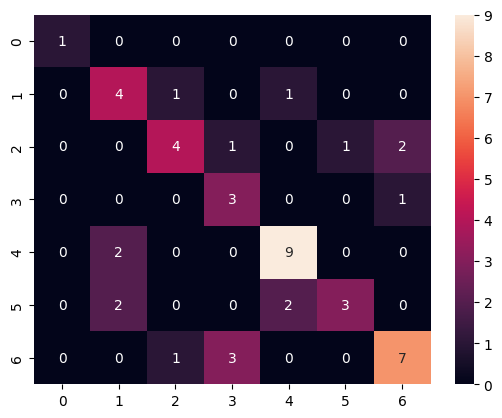

In [126]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm=confusion_matrix(y_test,predicted_labels)
# mapped=cv.fit_transform([y_test,predicted_labels])
sn.heatmap(cm,annot=True)
# from sklearn.

In [127]:
model.save('audio_emotion_classification.keras')